# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい

In [1]:
import MeCab
mecab = MeCab.Tagger ('-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')

In [2]:
with open('neko.txt', 'r') as f:
    l_strip = [s.strip() for s in f.readlines() if s != '\n']

with open('neko.txt.mecab', mode='w') as f:
    for each in l_strip:
        f.write(mecab.parse(each))

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [3]:
import csv

with open('neko.txt.mecab', 'r') as f:
    reader = csv.reader(f)
    l_morpheme = [row for row in reader]

neko_morphemes, sentence_morphemes = [], []

for each_morpheme in l_morpheme:
    if each_morpheme[0] != 'EOS':
        
        d_morphemes = {}
        d_morphemes['surface'], d_morphemes['pos'] = each_morpheme[0].split('\t')
        d_morphemes['base'] = each_morpheme[6]
        d_morphemes['pos1'] = each_morpheme[1]
        
        sentence_morphemes.append(d_morphemes)
    else:
        neko_morphemes.append(sentence_morphemes)
        sentence_morphemes = []

neko_morphemes[:3]

[[{'surface': '一', 'pos': '名詞', 'base': '一', 'pos1': '数'}],
 [{'surface': '吾輩は猫である', 'pos': '名詞', 'base': '吾輩は猫である', 'pos1': '固有名詞'},
  {'surface': '。', 'pos': '記号', 'base': '。', 'pos1': '句点'}],
 [{'surface': '名前', 'pos': '名詞', 'base': '名前', 'pos1': '一般'},
  {'surface': 'は', 'pos': '助詞', 'base': 'は', 'pos1': '係助詞'},
  {'surface': 'まだ', 'pos': '副詞', 'base': 'まだ', 'pos1': '助詞類接続'},
  {'surface': '無い', 'pos': '形容詞', 'base': '無い', 'pos1': '自立'},
  {'surface': '。', 'pos': '記号', 'base': '。', 'pos1': '句点'}]]

## 31. 動詞
動詞の表層形をすべて抽出せよ．


In [4]:
verbs = set()

for sentence in neko_morphemes:
    for word in sentence:
        if word['pos'] == '動詞':
            verbs.add(word['surface'])

verbs

{'過ぎ去っ',
 '間に合い',
 '果せる',
 '留まっ',
 '立ちすくん',
 '叫ん',
 '借りる',
 '除け',
 '踏ん',
 '見縊',
 '磨っ',
 '気が付く',
 '惹く',
 '罹っ',
 '添え',
 '憤っ',
 'のばし',
 '取り',
 '吐い',
 'ゆか',
 '縮め',
 '立ち上っ',
 'まかり間違っ',
 '描き出さ',
 'さがし',
 '生し',
 '寄りつか',
 'あやまる',
 '寝ころん',
 '踏み付け',
 'たた',
 '疑っ',
 'とら',
 '呑む',
 '着か',
 '分り',
 '蔽う',
 '行け',
 'て',
 '択ば',
 '守る',
 '窺う',
 'がる',
 '酬い',
 'ふわ',
 '向き直る',
 'やめ',
 '踊っ',
 '押しやる',
 '惹か',
 '合し',
 'やり過ごし',
 '寝転ん',
 '置く',
 'つづい',
 '圧し',
 '片付け',
 '汚す',
 'あるく',
 '捲き',
 '磨い',
 '評せ',
 'すれ',
 '飛び上がっ',
 '引きずり',
 '吹き込ん',
 '歩み寄っ',
 '稼い',
 '差しかかっ',
 '来ん',
 'やむ',
 '置こ',
 'れれ',
 'かかり',
 'がたつく',
 '着',
 '分っ',
 '停',
 '投げ出さ',
 '弱ら',
 '断っ',
 '舞っ',
 '怒鳴っ',
 '這い出し',
 '休ん',
 '処せ',
 'やっつけ',
 '誘い出す',
 '込め',
 '誘い出し',
 'かか',
 '逃げ込む',
 'にたて',
 '蒙ろ',
 '縫う',
 '依',
 'かかっ',
 '押しつける',
 '曝し',
 '蒔い',
 '廻さ',
 '衒い',
 '違い',
 'かくそ',
 '気に入っ',
 '劣っ',
 'はずす',
 '投げ込む',
 'たまら',
 '観る',
 '云っ',
 '笑える',
 '近づき',
 '諦める',
 'あらし',
 '進める',
 '食べる',
 '逝い',
 '話そ',
 '括り',
 'もぎとる',
 '飲も',
 '考え出す',
 'かう',
 'かける',
 '下る',
 '弾きゃ',
 'とっ',
 '乗り越え',
 'わか',

## 32. 動詞の基本形
動詞の基本形をすべて抽出せよ．

In [5]:
base_verbs = set()

for sentence in neko_morphemes:
    for word in sentence:
        if word['pos'] == '動詞':
            base_verbs.add(word['base'])

base_verbs

{'へぐ',
 '果せる',
 '仕切る',
 '借りる',
 '肥る',
 '呼びつける',
 '接す',
 '叶う',
 '気が付く',
 '惹く',
 'あやまる',
 '呑む',
 '蔽う',
 '振り落とす',
 '守る',
 'いっす',
 '窺う',
 'がる',
 '向き直る',
 '押しやる',
 '置く',
 'まつわる',
 '透す',
 '写す',
 '汚す',
 'あるく',
 '重んじる',
 '自惚れる',
 'やむ',
 'がたつく',
 '抱え込む',
 'ゆる',
 'つづく',
 '見逃す',
 '寄りつく',
 '誘い出す',
 '数え切れる',
 'かたちづくる',
 '逃げ込む',
 '更ける',
 '縫う',
 '引きつける',
 '躍り込む',
 '押しつける',
 '仰向く',
 '裏返す',
 '焚ける',
 '消え去る',
 'はずす',
 '投げ込む',
 '任じる',
 '見合わせる',
 '観る',
 'ぱちつかせる',
 '笑える',
 '諦める',
 '進める',
 '食べる',
 '取りつく',
 '評す',
 'もぎとる',
 '考え出す',
 'とどめる',
 'かう',
 'かける',
 '下る',
 'ゆるむ',
 '切り落す',
 '坐り込む',
 '剥がれる',
 '起す',
 'わかる',
 '思いやる',
 '倍する',
 '落ちつく',
 '倒れる',
 'かわす',
 '反り返る',
 '可愛がる',
 '就く',
 '懸ける',
 '煩わす',
 '鳴かせる',
 '据わる',
 '眠る',
 'とまる',
 '迷い込む',
 '持ち上げる',
 '逆らう',
 '磨り潰す',
 '極める',
 '思い及ぶ',
 '立ち返る',
 '履く',
 '押し倒す',
 '招く',
 '平伏す',
 '触る',
 '事足る',
 '振り翳す',
 '究める',
 '凝り固まる',
 '引き払う',
 '生む',
 '途切れる',
 '応ずる',
 '務める',
 '待ちかねる',
 '損じる',
 '志す',
 '攻める',
 '聞きつける',
 '還す',
 '引越す',
 '聳やかす',
 '帰す',
 '降り込む',
 '余る',
 'できる',
 'おこす',
 '切り刻む',


## 33. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [6]:
b_of_a = set()

for sentence in neko_morphemes:
    candidate = []
    
    for word in sentence:
        if word['pos'] == '名詞':
            candidate.append(word['surface'])
        elif word['pos'] == '助詞' and word['surface'] == 'の' and len(candidate) > 0:
            candidate.append(word['surface'])
        
        if len(candidate) == 3 and candidate[1] == 'の':
            b_of_a.add(''.join(candidate))

b_of_a

{'茶の木の根',
 'そうじゃないの飄然',
 '人間の取扱',
 '梅干の楽しみ',
 '時の蟷螂',
 '蟷螂の羽根',
 '何の水彩絵具',
 '西洋人の遣り口',
 'のの見当',
 '例の櫃',
 '自分の妻',
 '理窟の俗物',
 '珠の名人',
 '僕の有望',
 '質の奴',
 '寒月のの',
 '智慧の発達',
 '人間の取り扱',
 '上級生の命令',
 '時候の廻り',
 '奴の娘',
 '天地の間',
 '吾輩の前',
 '君の国の書生',
 'つづらの中',
 'ニーチェの時代',
 '通例のもの',
 '十一月の天長節',
 '私の御馳走',
 '上今の所',
 '千金の子',
 '角屋敷の金田',
 '迷亭の月並',
 '僕の妻',
 '刃の裏',
 '案の敵',
 '先生の説',
 '静岡の伯父',
 'あの男の口',
 '耶蘇教の神',
 '万年の後',
 '日本の文明',
 '窮屈の奴',
 '山の芋のねだん',
 'ステッキの代り',
 '行徳の俎',
 '油断の世の中',
 '教育の君子',
 '春の灯火',
 '他の庭',
 '取次の主人',
 '可哀そうの捕虜',
 '人間の用',
 '金田のよう',
 '公等の他',
 '座布団の上',
 '人の鼠',
 '主人の一夜作り',
 '得意の持主',
 '眼識のもの',
 '親の死目',
 '主人の蛇蝎のごとく',
 '垣根の穴',
 '敵の力',
 '細君の襲撃',
 '頃の女学生',
 '主人の命令',
 '主人のうち',
 '書物の表紙',
 '釜の周囲',
 '趣向のそれ',
 '俺のの',
 '法の者',
 'ほかのもの',
 'それの事',
 '僕のうち',
 '金田の娘',
 '鰹節の一',
 '猫背の鼻',
 '吾輩のシンフォニー',
 '泥棒のところ',
 '教育の結果',
 '籠の中',
 '左の方',
 '眼の何時',
 '彼の友',
 '好男子の入来',
 '今の音',
 'のの判然',
 '船の中',
 '大兄の癪に障る',
 '隣の室',
 '三字のゆ',
 '警察の厄介',
 '事の心配',
 '人のうち',
 'たまの日曜',
 '綿ネルの洗いざらし',
 '敵の考',
 '保険の掛金',
 '水と油のよう',
 '奥様の鼻',
 '彼のテ

## 34. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [7]:
continuous_noun = []

for sentence in neko_morphemes:
    candidates, candidate = [], []
    continuous = False
    
    for word in sentence:
        if word['pos'] == '名詞':
            candidate.append(word['surface'])
            continuous = True
        elif continuous == True:
            if len(candidate) > 1:
                candidates.append(candidate)
            candidate = []
    
    if candidates != []:
        for candidate in candidates:
            print(candidate)
            continuous_noun.append(candidate)
    
continuous_noun

['した', '所']
['人間', '中']
['一番', '獰悪']
['時', '妙']
['一', '毛']
['その後', '猫']
['一', '度']
['邸', '内']
['書生', '以外']
['四', '五', '遍']
['この間', 'おさん']
['三', '馬']
['御台', '所']
['まま', '奥']
['終日', '書斎']
['勉強', '家']
['勉強', '家']
['勤勉', '家']
['二', '三', 'ページ']
['主人', '以外']
['限り', '吾輩']
['朝', '主人']
['一番', '心持']
['一つ', '床']
['最後', '大変']
['神経', '胃弱', '性']
['言語', '同断']
['しよう', 'もの']
['家内', '総', 'がかり']
['筋', '向']
['白', '君']
['度', '毎']
['白', '君']
['先日', '玉']
['四', '疋']
['三日', '目']
['四', '疋']
['白', '君']
['我', '等', '猫', '族']
['家族', '的', '生活']
['三毛', '君']
['我々', '同族', '間']
['一番', '先']
['彼等', '人間']
['我', '等']
['吾', '人']
['白', '君']
['三', '毛', '君']
['いって', '人']
['間違い', 'だらけ']
['後架', '先生']
['にも', '関']
['月給', '日']
['毎日', '毎日', '書斎']
['人', 'の']
['自ら', '筆']
['眼鏡', '越']
['一室', '内']
['以太', '利']
['大家', 'アンドレア・デル・サルト']
['自然', 'その物']
['露', '華']
['寒', '鴉']
['これ', '一', '幅']
['活', '画']
['翌日', '吾輩']
['出て', '心持']
['辛', '棒']
['今', '吾輩']
['今', '吾輩']
['波', '斯産']
['上', '不思議']
['盲', '猫']
['心中', 'ひそか']
['あと', '大']
['打ち壊', 'わし']
['辛', '棒'

[['した', '所'],
 ['人間', '中'],
 ['一番', '獰悪'],
 ['時', '妙'],
 ['一', '毛'],
 ['その後', '猫'],
 ['一', '度'],
 ['邸', '内'],
 ['書生', '以外'],
 ['四', '五', '遍'],
 ['この間', 'おさん'],
 ['三', '馬'],
 ['御台', '所'],
 ['まま', '奥'],
 ['終日', '書斎'],
 ['勉強', '家'],
 ['勉強', '家'],
 ['勤勉', '家'],
 ['二', '三', 'ページ'],
 ['主人', '以外'],
 ['限り', '吾輩'],
 ['朝', '主人'],
 ['一番', '心持'],
 ['一つ', '床'],
 ['最後', '大変'],
 ['神経', '胃弱', '性'],
 ['言語', '同断'],
 ['しよう', 'もの'],
 ['家内', '総', 'がかり'],
 ['筋', '向'],
 ['白', '君'],
 ['度', '毎'],
 ['白', '君'],
 ['先日', '玉'],
 ['四', '疋'],
 ['三日', '目'],
 ['四', '疋'],
 ['白', '君'],
 ['我', '等', '猫', '族'],
 ['家族', '的', '生活'],
 ['三毛', '君'],
 ['我々', '同族', '間'],
 ['一番', '先'],
 ['彼等', '人間'],
 ['我', '等'],
 ['吾', '人'],
 ['白', '君'],
 ['三', '毛', '君'],
 ['いって', '人'],
 ['間違い', 'だらけ'],
 ['後架', '先生'],
 ['にも', '関'],
 ['月給', '日'],
 ['毎日', '毎日', '書斎'],
 ['人', 'の'],
 ['自ら', '筆'],
 ['眼鏡', '越'],
 ['一室', '内'],
 ['以太', '利'],
 ['大家', 'アンドレア・デル・サルト'],
 ['自然', 'その物'],
 ['露', '華'],
 ['寒', '鴉'],
 ['これ', '一', '幅'],
 ['活', '画'],
 ['翌日', '吾輩'],
 

## 35. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [8]:
from collections import Counter

counter = Counter([word['surface'] for sentence in neko_morphemes for word in sentence])
counter.most_common()

[('の', 9103),
 ('。', 7484),
 ('、', 6772),
 ('て', 6697),
 ('は', 6384),
 ('に', 6148),
 ('を', 6068),
 ('と', 5474),
 ('が', 5258),
 ('た', 3916),
 ('で', 3783),
 ('「', 3231),
 ('」', 3225),
 ('も', 2433),
 ('だ', 2270),
 ('し', 2264),
 ('ない', 2254),
 ('から', 2001),
 ('ある', 1714),
 ('な', 1579),
 ('か', 1432),
 ('ん', 1415),
 ('いる', 1249),
 ('事', 1177),
 ('へ', 1033),
 ('する', 986),
 ('もの', 972),
 ('です', 960),
 ('君', 953),
 ('云う', 937),
 ('主人', 928),
 ('う', 922),
 ('よう', 687),
 ('ね', 673),
 ('この', 635),
 ('ば', 612),
 ('御', 595),
 ('その', 560),
 ('なる', 527),
 ('何', 518),
 ('よ', 508),
 ('さ', 479),
 ('なら', 478),
 ('吾輩', 477),
 ('ます', 458),
 ('人', 450),
 ('そう', 448),
 ('い', 443),
 ('…', 433),
 ('じゃ', 427),
 ('なっ', 403),
 ('これ', 397),
 ('それ', 370),
 ('来', 367),
 ('れ', 350),
 ('見', 349),
 ('でも', 343),
 ('迷亭', 343),
 ('——', 319),
 ('時', 314),
 ('ところ', 310),
 ('まで', 304),
 ('いい', 295),
 ('一', 294),
 ('方', 294),
 ('まし', 288),
 ('上', 286),
 ('ず', 285),
 ('寒月', 278),
 ('ぬ', 276),
 ('先生', 274),
 ('見る', 271),
 ('ませ',

## 36. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [9]:
!apt install -y fonts-ipafont

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


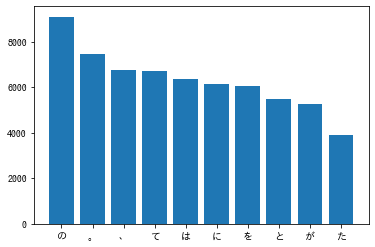

In [10]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_manager.fontManager.addfont("/usr/share/fonts/truetype/fonts-japanese-gothic.ttf")
plt.rc('font', family="IPAGothic")

top10 = counter.most_common()[:10]
plt.bar(x=[each[0] for each in top10], height=[each[1] for each in top10])
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

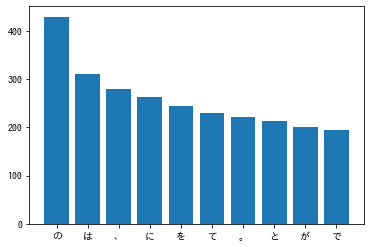

In [11]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_manager.fontManager.addfont("/usr/share/fonts/truetype/fonts-japanese-gothic.ttf")
plt.rc('font', family="IPAGothic")

include_neko_sentences = []

for sentence in neko_morphemes:
    for word in sentence:
        if word['pos'] == '名詞' and word['surface'] == '猫':
            include_neko_sentences.append(sentence)

counter = Counter([word['surface'] for sentence in include_neko_sentences for word in sentence if word['surface']!='猫'])
top10 = counter.most_common()[:10]
plt.bar(x=[each[0] for each in top10], height=[each[1] for each in top10])
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

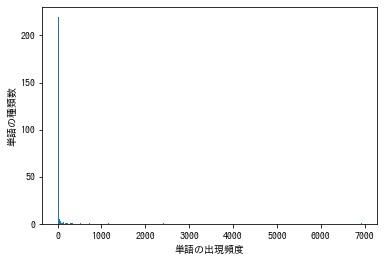

In [12]:
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt

count_d = defaultdict(int)
counter = Counter([word['surface'] for sentence in neko_morphemes for word in sentence])
for _, count in counter.most_common()[::-1]:
    count_d[count] += 1

keys, values = zip(*dict(count_d).items())

plt.hist(list(values), bins=len(values), range=(min(values), max(values)))
plt.xlabel('単語の出現頻度')
plt.ylabel('単語の種類数')
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

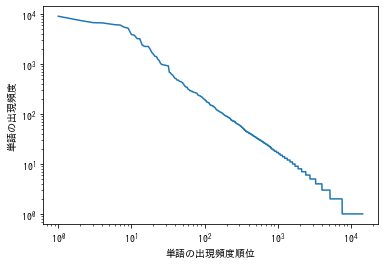

In [39]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_manager.fontManager.addfont("/usr/share/fonts/truetype/fonts-japanese-gothic.ttf")
plt.rc('font', family="IPAGothic")

label, y = zip(*counter.most_common())
x = list(range(1, len(counter)+1))

_, ax = plt.subplots()
ax.plot(x, y)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('単語の出現頻度順位')
ax.set_ylabel('単語の出現頻度')
plt.show()

[https://ja.wikipedia.org/wiki/ジップの法則](https://ja.wikipedia.org/wiki/ジップの法則)

> ジップの法則（ジップのほうそく、Zipf's law）あるいはジフの法則とは、出現頻度が k 番目に大きい要素が、1位のものの頻度と比較して
$$
1/k
$$
に比例するという経験則である。